# Assignment 1: Mobile Phone Activity Analysis

**Student:** Anny Christelle Irakoze  
**Date:** 4 February 2026

This notebook analyzes Call Details Records (CDR) from mobile phone activity in Milan, Italy.

---

## Import Libraries

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style("whitegrid")

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3


## Load the Data Files

In [42]:
# Load the three CSV files
print("Loading data files...")

df1 = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
print(f"✓ File 1 (Nov 2): {len(df1):,} records")

df2 = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
print(f"✓ File 2 (Nov 4): {len(df2):,} records")

df3 = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')
print(f"✓ File 3 (Nov 6): {len(df3):,} records")

print(f"\nTotal: {len(df1) + len(df2) + len(df3):,} records")

Loading data files...
✓ File 1 (Nov 2): 1,847,331 records
✓ File 2 (Nov 4): 2,299,544 records
✓ File 3 (Nov 6): 2,417,156 records

Total: 6,564,031 records


## Explore the Data

In [43]:
# Look at the structure of the data
print("First few rows:")
print(df1.head())

print("\n" + "="*80)
print("Column names:")
print(df1.columns.tolist())

print("\n" + "="*80)
print("Data types:")
print(df1.dtypes)

First few rows:
              datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0  2013-11-02 00:00:00       1            0  0.2445     NaN     NaN      NaN   
1  2013-11-02 00:00:00       1           39  1.4952  1.1213  0.2708   0.3004   
2  2013-11-02 00:00:00       1           53  0.0018  0.0036     NaN      NaN   
3  2013-11-02 00:00:00       2            0  0.2458     NaN     NaN      NaN   
4  2013-11-02 00:00:00       2           39  1.5028  1.1243  0.2751   0.3023   

   internet  
0       NaN  
1   46.5094  
2       NaN  
3       NaN  
4   46.6933  

Column names:
['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet']

Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object


## Add Date Columns

In [44]:
# Add date columns to each dataframe
df1['date'] = '2013-11-02'
df2['date'] = '2013-11-04'
df3['date'] = '2013-11-06'

print("✓ Date columns added to all dataframes")
print("\nSample:")
print(df1[['date']].head(3))

✓ Date columns added to all dataframes

Sample:
         date
0  2013-11-02
1  2013-11-02
2  2013-11-02


## Combine the Dataframes

In [45]:
# Combine all three dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

print(f"✓ Combined dataframe created")
print(f"  Shape: {df.shape}")
print(f"  Total records: {len(df):,}")

print("\nFirst few rows of combined data:")
print(df.head())

✓ Combined dataframe created
  Shape: (6564031, 9)
  Total records: 6,564,031

First few rows of combined data:
              datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0  2013-11-02 00:00:00       1            0  0.2445     NaN     NaN      NaN   
1  2013-11-02 00:00:00       1           39  1.4952  1.1213  0.2708   0.3004   
2  2013-11-02 00:00:00       1           53  0.0018  0.0036     NaN      NaN   
3  2013-11-02 00:00:00       2            0  0.2458     NaN     NaN      NaN   
4  2013-11-02 00:00:00       2           39  1.5028  1.1243  0.2751   0.3023   

   internet        date  
0       NaN  2013-11-02  
1   46.5094  2013-11-02  
2       NaN  2013-11-02  
3       NaN  2013-11-02  
4   46.6933  2013-11-02  


## Extract Hour from Datetime

In [46]:
# Convert datetime column and extract hour
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

print("✓ Hour column extracted from datetime")
print(f"\nHours range from {df['hour'].min()} to {df['hour'].max()}")
print(f"\nSample:")
print(df[['datetime', 'hour']].head())

✓ Hour column extracted from datetime

Hours range from 0 to 23

Sample:
    datetime  hour
0 2013-11-02     0
1 2013-11-02     0
2 2013-11-02     0
3 2013-11-02     0
4 2013-11-02     0


## Check for Missing Values

In [47]:
# Check for missing values
print("Checking for missing values...\n")

missing_before = df.isnull().sum()
total_missing = missing_before.sum()

print("Missing values by column:")
for col, count in missing_before.items():
    if count > 0:
        percentage = (count / len(df)) * 100
        print(f"  {col}: {count:,} ({percentage:.2f}%)")

if total_missing == 0:
    print("  ✓ No missing values found!")

print(f"\nTotal missing values: {total_missing:,}")

Checking for missing values...

Missing values by column:
  smsin: 3,964,171 (60.39%)
  smsout: 5,025,738 (76.56%)
  callin: 4,761,685 (72.54%)
  callout: 3,764,484 (57.35%)
  internet: 3,621,117 (55.17%)

Total missing values: 21,137,195


## Fill Missing Values with Mean

In [48]:
# Fill missing values in numeric activity columns
numeric_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']

records_modified = 0

if total_missing > 0:
    print("Filling missing values with column means...\n")
    
    for col in numeric_cols:
        if col in df.columns:
            missing_count = df[col].isnull().sum()
            if missing_count > 0:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                records_modified += missing_count
                print(f"  ✓ {col}: Filled {missing_count:,} values with mean {mean_value:.2f}")
    
    print(f"\n✓ Total records modified: {records_modified:,}")
else:
    print("✓ No missing values to fill!")

Filling missing values with column means...

  ✓ smsin: Filled 3,964,171 values with mean 7.86
  ✓ smsout: Filled 5,025,738 values with mean 7.44
  ✓ callin: Filled 4,761,685 values with mean 7.74
  ✓ callout: Filled 3,764,484 values with mean 5.69
  ✓ internet: Filled 3,621,117 values with mean 101.98

✓ Total records modified: 21,137,195


## Create Aggregate Columns

In [49]:
# Create aggregate columns
df['total_sms'] = df['smsin'] + df['smsout']
df['total_calls'] = df['callin'] + df['callout']
df['total_internet'] = df['internet']
df['total_activity'] = df['total_sms'] + df['total_calls'] + df['total_internet']

print("✓ Created aggregate columns:")
print("  - total_sms")
print("  - total_calls")
print("  - total_internet")
print("  - total_activity")

print("\nSample with aggregate columns:")
print(df[['CellID', 'hour', 'total_sms', 'total_calls', 'total_internet', 'total_activity']].head())

✓ Created aggregate columns:
  - total_sms
  - total_calls
  - total_internet
  - total_activity

Sample with aggregate columns:
   CellID  hour  total_sms  total_calls  total_internet  total_activity
0       1     0   7.685251    13.425298      101.976153      123.086702
1       1     0   2.616500     0.571200       46.509400       49.697100
2       1     0   0.005400    13.425298      101.976153      115.406850
3       2     0   7.686551    13.425298      101.976153      123.088002
4       2     0   2.627100     0.577400       46.693300       49.897800


---
# ASSIGNMENT QUESTIONS
---

## Question 1: Total Records 

In [50]:
# How many total records across all 3 datasets?
total_records = len(df)

print("="*80)
print("QUESTION 1: Total Records")
print("="*80)
print(f"\n- Answer: {total_records:,} total records across all 3 datasets")

QUESTION 1: Total Records

- Answer: 6,564,031 total records across all 3 datasets


## Question 2: Unique Grid Squares 

In [51]:
# How many unique grid squares (CellID)?
unique_cells = df['CellID'].nunique()

print("="*80)
print("QUESTION 2: Unique Grid Squares")
print("="*80)
print(f"\n- Answer: {unique_cells:,} unique grid squares (CellID)")

QUESTION 2: Unique Grid Squares

- Answer: 10,000 unique grid squares (CellID)


## Question 3: Unique Country Codes 

In [52]:
# How many unique country codes?
unique_countries = df['countrycode'].nunique()
country_codes = sorted(df['countrycode'].unique())

print("="*80)
print("QUESTION 3: Unique Country Codes")
print("="*80)
print(f"\n- Answer: {unique_countries} unique country codes")
print(f"   Country codes: {country_codes}")

QUESTION 3: Unique Country Codes

- Answer: 302 unique country codes
   Country codes: [np.int64(0), np.int64(1), np.int64(7), np.int64(20), np.int64(27), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(36), np.int64(39), np.int64(40), np.int64(41), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(81), np.int64(82), np.int64(84), np.int64(86), np.int64(90), np.int64(91), np.int64(92), np.int64(93), np.int64(94), np.int64(95), np.int64(98), np.int64(211), np.int64(212), np.int64(213), np.int64(216), np.int64(218), np.int64(220), np.int64(221), np.int64(222), np.int64(223), np.int64(224), np.int64(225), np.int64(226), np.int64(227), np.int64(228), np.int64(229), np.int64(230), np.int64(231), np

## Question 4: Missing Values Analysis 

In [53]:
# Missing values summary
print("="*80)
print("QUESTION 4: Missing Values Analysis")
print("="*80)

print(f"\n- a) Were there missing values? {'Yes' if total_missing > 0 else 'No'}")

if total_missing > 0:
    print(f"\n- b) Imputation method: Filled with column mean")
    
    print(f"\n- c) Columns with most missing values:")
    missing_sorted = missing_before[missing_before > 0].sort_values(ascending=False)
    for col, count in missing_sorted.items():
        print(f"      - {col}: {count:,} missing values")
    
    print(f"\n- d) Total records modified: {records_modified:,}")

QUESTION 4: Missing Values Analysis

- a) Were there missing values? Yes

- b) Imputation method: Filled with column mean

- c) Columns with most missing values:
      - smsout: 5,025,738 missing values
      - callin: 4,761,685 missing values
      - smsin: 3,964,171 missing values
      - callout: 3,764,484 missing values
      - internet: 3,621,117 missing values

- d) Total records modified: 21,137,195


## Question 5: Peak Hour Analysis 

QUESTION 5: Peak Hour Analysis

- a) Most common peak hour: 17:00
      Total activity: 51,477,441

- b) Hour with lowest activity: 4:00
      Total activity: 11,777,007


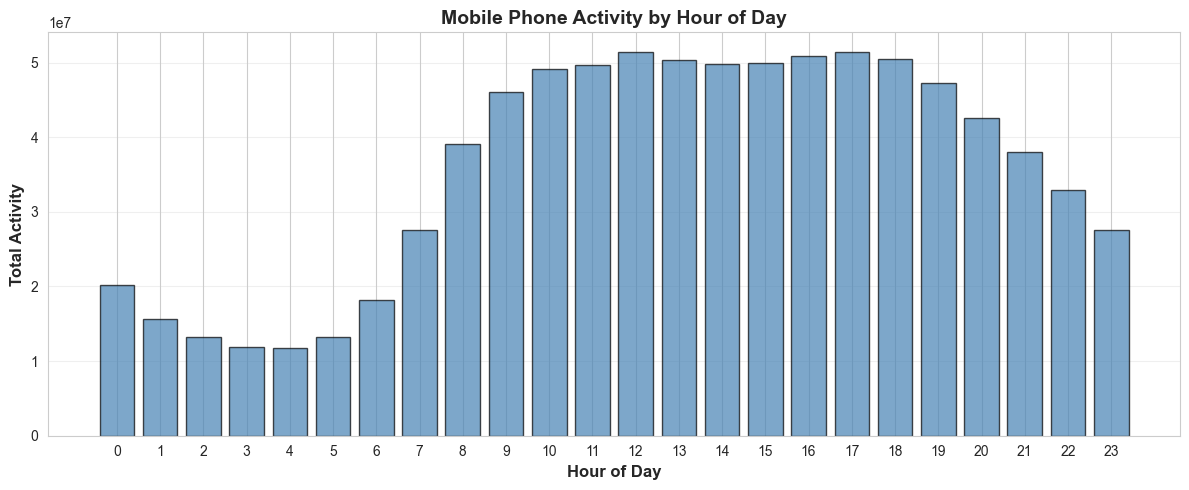

In [54]:
# What is the peak hour and lowest activity hour?
hourly_activity = df.groupby('hour')['total_activity'].sum()

peak_hour = hourly_activity.idxmax()
lowest_hour = hourly_activity.idxmin()

print("="*80)
print("QUESTION 5: Peak Hour Analysis")
print("="*80)

print(f"\n- a) Most common peak hour: {peak_hour}:00")
print(f"      Total activity: {hourly_activity[peak_hour]:,.0f}")

print(f"\n- b) Hour with lowest activity: {lowest_hour}:00")
print(f"      Total activity: {hourly_activity[lowest_hour]:,.0f}")

# Visualize
plt.figure(figsize=(12, 5))
plt.bar(hourly_activity.index, hourly_activity.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.ylabel('Total Activity', fontsize=12, fontweight='bold')
plt.title('Mobile Phone Activity by Hour of Day', fontsize=14, fontweight='bold')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Question 6: Call Statistics by Hour 

In [55]:
# Calculate mean, median, std, min, max for total calls by hour
hourly_calls = df.groupby('hour')['total_calls'].sum()

print("="*80)
print("QUESTION 6: Call Statistics by Hour")
print("="*80)

print(f"\n- Mean:   {hourly_calls.mean():,.2f}")
print(f"- Median: {hourly_calls.median():,.2f}")
print(f"- Std:    {hourly_calls.std():,.2f}")
print(f"- Min:    {hourly_calls.min():,.0f} (at hour {hourly_calls.idxmin()})")
print(f"- Max:    {hourly_calls.max():,.0f} (at hour {hourly_calls.idxmax()})")

QUESTION 6: Call Statistics by Hour

- Mean:   3,671,836.31
- Median: 4,145,010.33
- Std:    1,876,942.91
- Min:    971,111 (at hour 3)
- Max:    5,801,570 (at hour 17)


## Question 7: Daytime vs Nighttime Activity 

QUESTION 7: Daytime vs Nighttime Activity

- Daytime (6am-8pm):   73.55%
- Nighttime (8pm-6am): 26.45%


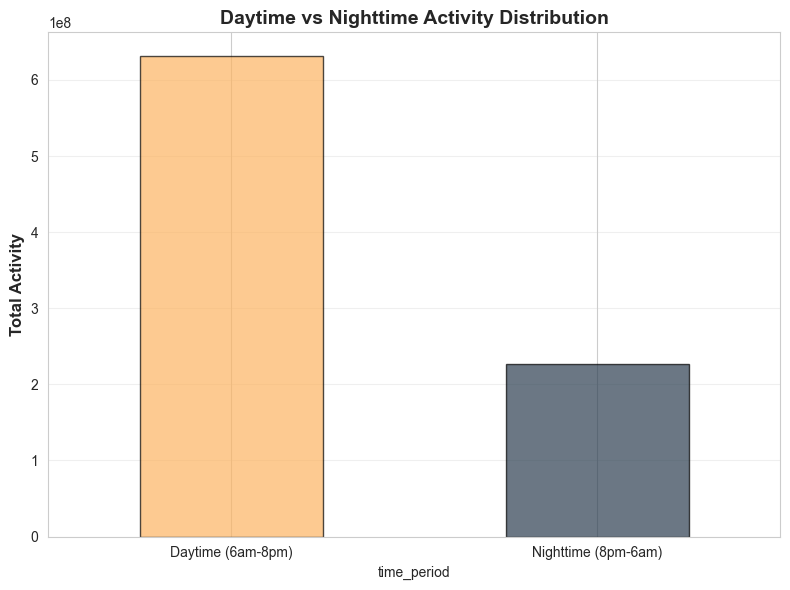

In [56]:
# What percentage of activity happens during daytime vs nighttime?
# Daytime: 6am-8pm, Nighttime: 8pm-6am

df['time_period'] = df['hour'].apply(
    lambda x: 'Daytime (6am-8pm)' if 6 <= x <= 19 else 'Nighttime (8pm-6am)'
)

period_activity = df.groupby('time_period')['total_activity'].sum()
total_act = period_activity.sum()

daytime_pct = (period_activity.get('Daytime (6am-8pm)', 0) / total_act) * 100
nighttime_pct = (period_activity.get('Nighttime (8pm-6am)', 0) / total_act) * 100

print("="*80)
print("QUESTION 7: Daytime vs Nighttime Activity")
print("="*80)

print(f"\n- Daytime (6am-8pm):   {daytime_pct:.2f}%")
print(f"- Nighttime (8pm-6am): {nighttime_pct:.2f}%")

# Visualize
plt.figure(figsize=(8, 6))
period_activity.plot(kind='bar', color=['#FDB462', '#2C3E50'], edgecolor='black', alpha=0.7)
plt.ylabel('Total Activity', fontsize=12, fontweight='bold')
plt.title('Daytime vs Nighttime Activity Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Question 8: International vs Domestic Call Timing 

QUESTION 8: International vs Domestic Call Timing

- Domestic calls peak at:      17:00
- International calls peak at: 12:00

→ Peak hours are DIFFERENT


<Figure size 1200x600 with 0 Axes>

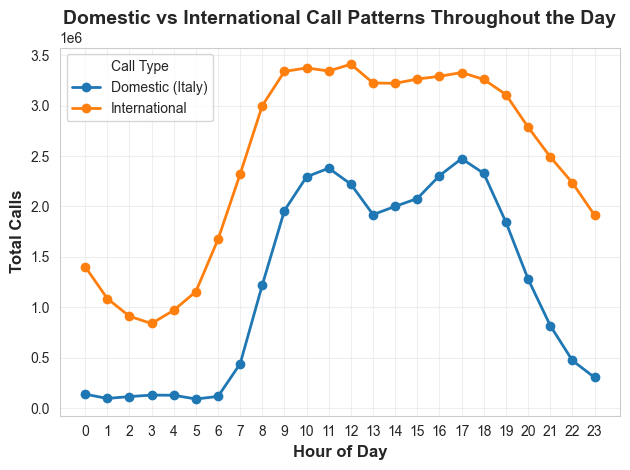

In [57]:
# Do international calls happen at different times than domestic?
# Italy country code is 39

df['call_type'] = df['countrycode'].apply(
    lambda x: 'Domestic (Italy)' if x == 39 else 'International'
)

call_patterns = df.groupby(['hour', 'call_type'])['total_calls'].sum().unstack(fill_value=0)

domestic_peak = call_patterns['Domestic (Italy)'].idxmax()
intl_peak = call_patterns['International'].idxmax()

print("="*80)
print("QUESTION 8: International vs Domestic Call Timing")
print("="*80)

print(f"\n- Domestic calls peak at:      {domestic_peak}:00")
print(f"- International calls peak at: {intl_peak}:00")
print(f"\n→ Peak hours are {'DIFFERENT' if domestic_peak != intl_peak else 'THE SAME'}")

# Visualize
plt.figure(figsize=(12, 6))
call_patterns.plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.ylabel('Total Calls', fontsize=12, fontweight='bold')
plt.title('Domestic vs International Call Patterns Throughout the Day', fontsize=14, fontweight='bold')
plt.legend(title='Call Type', fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(range(24))
plt.tight_layout()
plt.show()

## Question 9: Statistical Comparisons with NumPy 

In [58]:
# Use numpy for statistical comparisons between domestic and international

domestic_data = df[df['call_type'] == 'Domestic (Italy)']
intl_data = df[df['call_type'] == 'International']

domestic_calls_array = np.array(domestic_data['total_calls'])
intl_calls_array = np.array(intl_data['total_calls'])

print("="*80)
print("QUESTION 9: Statistical Comparisons (NumPy)")
print("="*80)

print(f"\n- Domestic Calls Statistics:")
print(f"   Mean: {np.mean(domestic_calls_array):.2f}")
print(f"   Std:  {np.std(domestic_calls_array):.2f}")
print(f"   Max:  {np.max(domestic_calls_array):.0f}")

print(f"\n- International Calls Statistics:")
print(f"   Mean: {np.mean(intl_calls_array):.2f}")
print(f"   Std:  {np.std(intl_calls_array):.2f}")
print(f"   Max:  {np.max(intl_calls_array):.0f}")

QUESTION 9: Statistical Comparisons (NumPy)

- Domestic Calls Statistics:
   Mean: 40.52
   Std:  93.29
   Max:  2724

- International Calls Statistics:
   Mean: 10.09
   Std:  3.81
   Max:  105


## Question 10: Call Percentages 

In [59]:
# What percentage of calls are international vs domestic?

call_totals = df.groupby('call_type')['total_calls'].sum()
total_calls = call_totals.sum()

domestic_call_pct = (call_totals.get('Domestic (Italy)', 0) / total_calls) * 100
intl_call_pct = (call_totals.get('International', 0) / total_calls) * 100

print("="*80)
print("QUESTION 10: Call Percentages")
print("="*80)

print(f"\n- Domestic (Italy): {domestic_call_pct:.2f}%")
print(f"- International:    {intl_call_pct:.2f}%")

QUESTION 10: Call Percentages

- Domestic (Italy): 33.11%
- International:    66.89%


## Question 11: SMS Percentages 

In [60]:
# What percentage of SMS are international vs domestic?

sms_totals = df.groupby('call_type')['total_sms'].sum()
total_sms = sms_totals.sum()

domestic_sms_pct = (sms_totals.get('Domestic (Italy)', 0) / total_sms) * 100
intl_sms_pct = (sms_totals.get('International', 0) / total_sms) * 100

print("="*80)
print("QUESTION 11: SMS Percentages")
print("="*80)

print(f"\n- Domestic (Italy): {domestic_sms_pct:.2f}%")
print(f"- International:    {intl_sms_pct:.2f}%")

QUESTION 11: SMS Percentages

- Domestic (Italy): 24.98%
- International:    75.02%


## Question 12: International Call Ratio 

In [61]:
# Are international calls more incoming or outgoing?

intl_df = df[df['call_type'] == 'International']

total_incoming_intl = intl_df['callin'].sum()
total_outgoing_intl = intl_df['callout'].sum()
ratio = total_incoming_intl / total_outgoing_intl if total_outgoing_intl > 0 else 0

print("="*80)
print("QUESTION 12: International Call Direction")
print("="*80)

print(f"\n- Total Incoming: {total_incoming_intl:,.0f}")
print(f"- Total Outgoing: {total_outgoing_intl:,.0f}")
print(f"- Ratio (Incoming/Outgoing): {ratio:.2f}")
print(f"\n→ International calls are more {'INCOMING' if ratio > 1 else 'OUTGOING'}")

QUESTION 12: International Call Direction

- Total Incoming: 36,911,801
- Total Outgoing: 22,038,041
- Ratio (Incoming/Outgoing): 1.67

→ International calls are more INCOMING


## Question 13: SMS vs Calls Correlation 

QUESTION 13: SMS vs Calls Correlation (Grid Level)

- Correlation coefficient: 0.9862
- Interpretation: Strong positive correlation


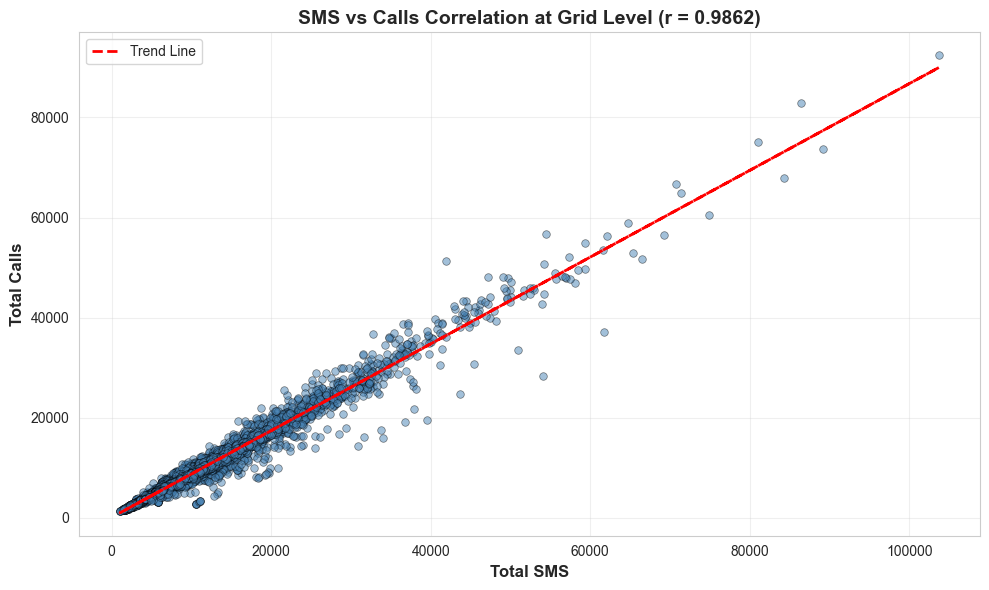

In [38]:
# Is there a correlation between SMS volume and Call volume at the grid level?

grid_agg = df.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum'
}).reset_index()

correlation = grid_agg['total_sms'].corr(grid_agg['total_calls'])

# Determine strength
if abs(correlation) > 0.7:
    strength = "Strong"
elif abs(correlation) > 0.4:
    strength = "Moderate"
else:
    strength = "Weak"

direction = "positive" if correlation > 0 else "negative"

print("="*80)
print("QUESTION 13: SMS vs Calls Correlation (Grid Level)")
print("="*80)

print(f"\n- Correlation coefficient: {correlation:.4f}")
print(f"- Interpretation: {strength} {direction} correlation")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(grid_agg['total_sms'], grid_agg['total_calls'], alpha=0.5, s=30, c='steelblue', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(grid_agg['total_sms'], grid_agg['total_calls'], 1)
p = np.poly1d(z)
plt.plot(grid_agg['total_sms'], p(grid_agg['total_sms']), "r--", linewidth=2, label='Trend Line')

plt.xlabel('Total SMS', fontsize=12, fontweight='bold')
plt.ylabel('Total Calls', fontsize=12, fontweight='bold')
plt.title(f'SMS vs Calls Correlation at Grid Level (r = {correlation:.4f})', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()